## Step 1: Download images of birds and non-birds

In [ ]:
from duckduckgo_search import DDGS
from fastcore.all import * 
import time, json
def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('bird photos', max_images=1)

In [ ]:
urls[0]

'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

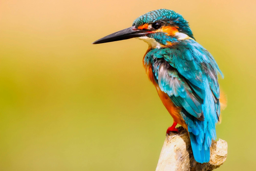

In [ ]:
from fastdownload import download_url
dest = 'resources/L1/bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

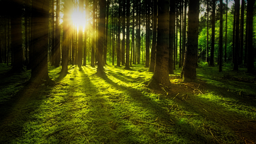

In [ ]:
forest_dest = 'resources/L1/forest.jpg'
download_url(search_images('forest photos', max_images=1)[0], forest_dest, show_progress=False)
Image.open(forest_dest).to_thumb(256, 256)

In [ ]:
searches = 'forest', 'bird'
path = Path('resources/L1/bird_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

## Step 2: Train our model

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

In [ ]:
failed

(#11) [Path('resources/L1/bird_or_not/forest/6357bfbb-6fbe-486a-9f00-1a2e9c1651f9.jpg'),Path('resources/L1/bird_or_not/forest/48382348-36c2-4362-85b7-4fe4650e9645.jpg'),Path('resources/L1/bird_or_not/forest/a5a2a8b4-b5c5-4e01-a4e8-a8315455699a.jpg'),Path('resources/L1/bird_or_not/forest/e303ca33-a8b4-42bc-9426-c2c66b8bf518.jpg'),Path('resources/L1/bird_or_not/bird/9bbd2add-d885-4e10-b956-ff3dc79be266.jpg'),Path('resources/L1/bird_or_not/bird/4cc3a909-9fcb-490c-ba8f-8506b232d14a.jpg'),Path('resources/L1/bird_or_not/bird/1d862889-b529-4fd6-9fc1-5a91c6c16621.jpg'),Path('resources/L1/bird_or_not/bird/c1e7ae73-fd8e-414d-bf39-18732555512d.jpg'),Path('resources/L1/bird_or_not/bird/17ab5f38-87cd-4af2-9611-c1194068c67a.jpg'),Path('resources/L1/bird_or_not/bird/4c21579f-afa2-476a-8a97-3ce45e93d234.jpg')...]

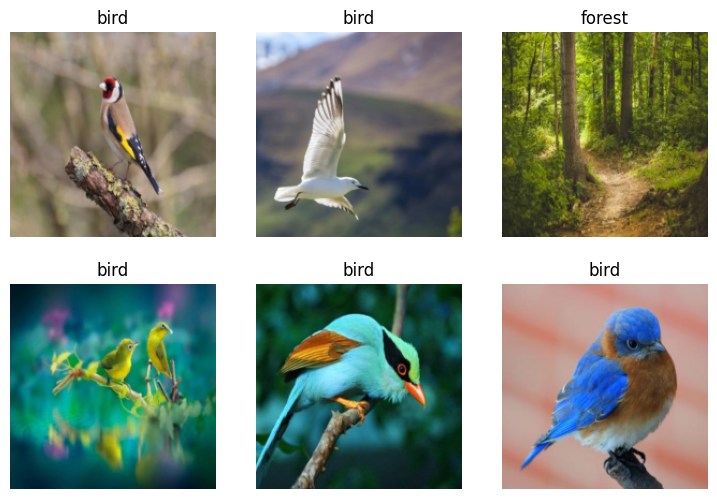

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label, 
    item_tfms=[Resize(192, method='squish')]).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/kerem/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:03<00:00, 13.7MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.555505,0.029378,0.000000,00:08


epoch,train_loss,valid_loss,error_rate,time
0,0.037406,0.000218,0.000000,00:02
1,0.017879,0.000445,0.000000,00:01
2,0.014395,0.000331,0.000000,00:01


## Step 3: Use our model

In [ ]:
is_bird,_,probs = learn.predict(PILImage.create('resources/L1/bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
